# Alucar - Analisando as vendas







In [ ]:
import pandas as pd

In [ ]:
pd.read_csv('alucar.csv').head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [ ]:
alucar = pd.read_csv('alucar.csv')

In [ ]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [ ]:
print('Quantidade de linhas e colunas: ', alucar.shape)

Quantidade de linhas e colunas:  (24, 2)


In [ ]:
# na varificação da quantidade de dados nulos, utilizamos a estrutura .sum().sum() para que o resultado traga a soma dos dados nulos de todas as colunas do df
print('Quantidade de dados nulos: ', alucar.isna().sum().sum())

Quantidade de dados nulos:  0


In [ ]:
# comando .dtypes para verificação dos tipos dos dados do df
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [ ]:
# convertendo o formato das datas de object/str para datetime
alucar['mes'] = pd.to_datetime(alucar['mes'])

In [ ]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [ ]:
!pip install seaborn==0.9.0
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

     |████████████████████████████████| 208 kB 4.4 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# função para verificar a versão do seaborn instalada
print(sns.__version__)

0.9.0


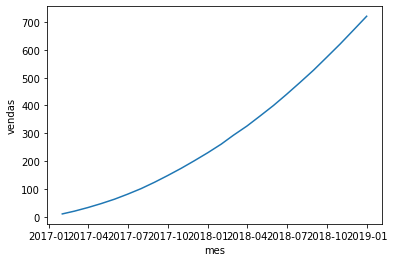

In [ ]:
# comando .lineplot para inserir um gráfico em linha no sns
sns.lineplot(x='mes', y='vendas', data=alucar)

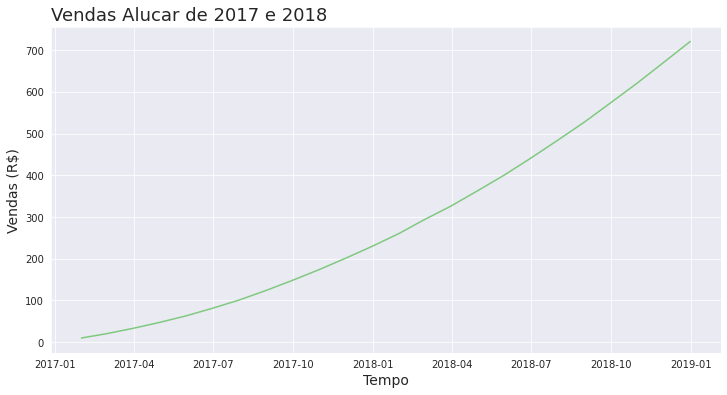

In [ ]:
# definindo a paleta de cores
sns.set_palette('Accent')
# ativando linhas de grade
sns.set_style('darkgrid')
# código gráfico atribuido a uma variável para remover o id do gráfico
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
# aumentando a visualização do gráfico
ax.figure.set_size_inches(12,6)
# inserindo título e jogando o mesmo para esquerda com o parâmetro loc
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
# alterando o label do eixo x
ax.set_xlabel('Tempo', fontsize=14)
# alterando o label do eixo y
ax.set_ylabel('Vendas (R$)', fontsize=14)
# comando para remover configurações que são exibinas na head do gráfico
ax = ax

In [ ]:
alucar.head() 

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [ ]:
# com a função .diff() do pd podemos criar uma coluna nova no df com a diferença entre os registros de um df linha a linha
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


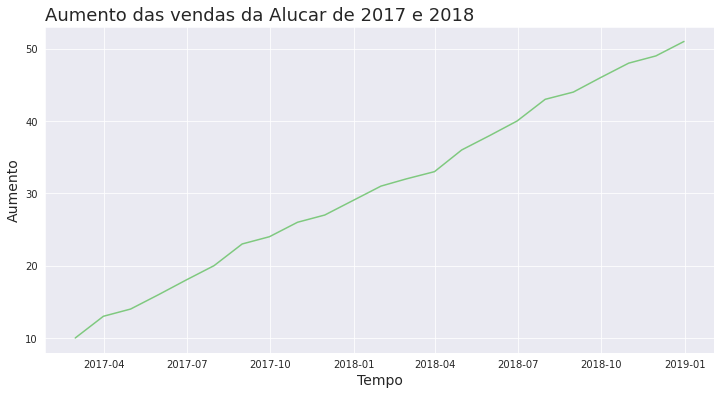

In [ ]:
# plotando gráfico da coluna aumento
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento das vendas da Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)
ax = ax

In [ ]:
# criando uma função para plotar gráficos apenas definindo os parâmetros definidos na função
def plotar(titulo, labelx, labely, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data=dataset)
  ax.figure.set_size_inches(12,6)
  ax.set_title(titulo, loc='left', fontsize=18)
  ax.set_xlabel(labelx, fontsize=14)
  ax.set_ylabel(labely, fontsize=14)
  ax = ax

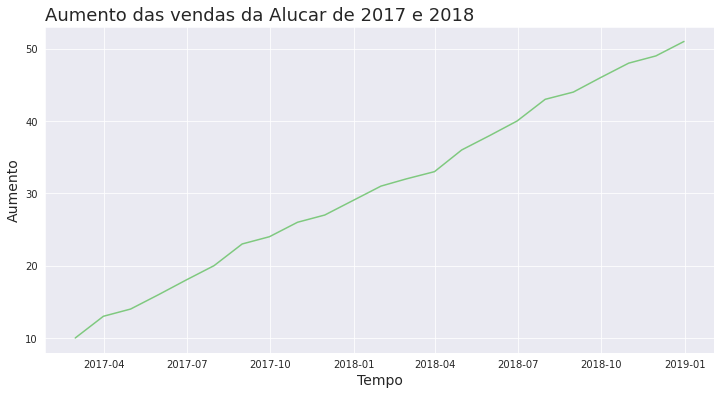

In [ ]:
# testando a função para plotagem do gráfico com as configurações pré-definidas na função
plotar('Aumento das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aumento', 'mes', 'aumento', alucar)

In [ ]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


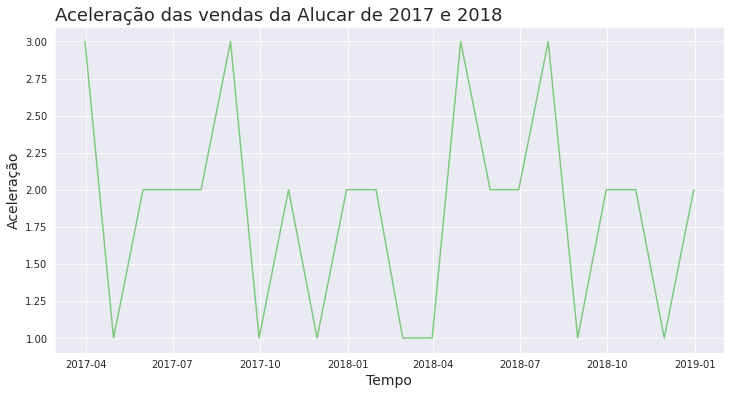

In [ ]:
plotar('Aceleração das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aceleração', 'mes', 'aceleracao', alucar)

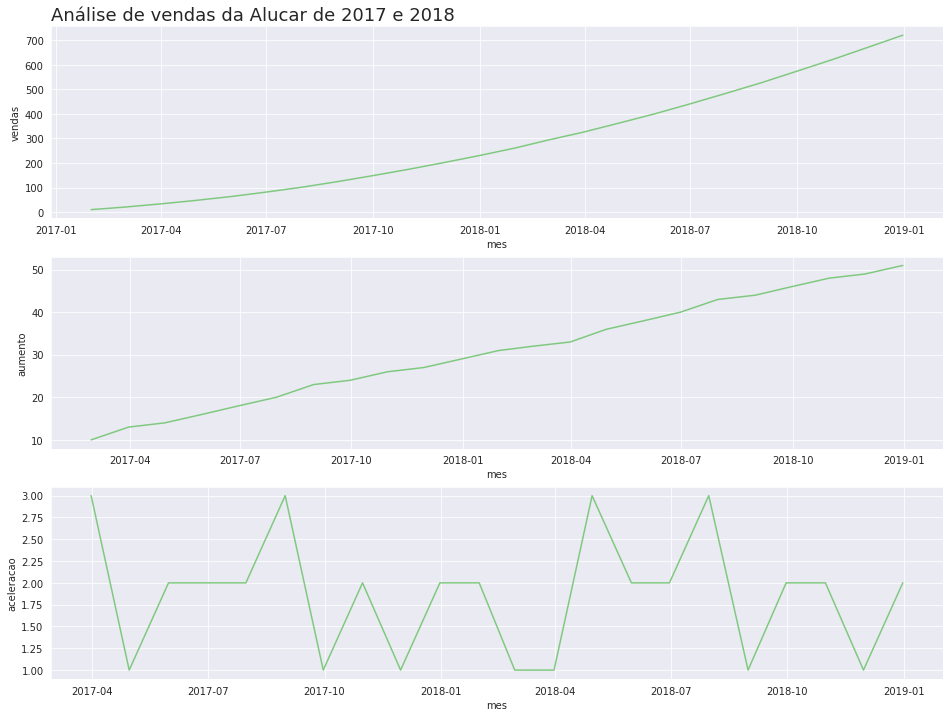

In [ ]:
# criando uma área de plotagem com o plt sendo as medidas o comprimentoxaltura
plt.figure(figsize=(16,12))
# definindo a distribuição das imagens
ax = plt.subplot(3,1,1)
# criando o título da área de plotagem
ax.set_title('Análise de vendas da Alucar de 2017 e 2018', fontsize=18, loc='left')
# definindo o gráfico da primera posição
sns.lineplot(x='mes', y='vendas', data=alucar)
# definindo o gráfico do meio
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data=alucar)
# definindo o gráfico abaixo na imagem
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax = ax

In [ ]:
# criando uma função para gerar a área de plotagem com os gráficos baseado em parâmetros
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
  plt.figure(figsize=(16,12))
  ax = plt.subplot(3,1,1)
  ax.set_title(titulo, fontsize=18, loc='left')
  sns.lineplot(x=x, y=y1, data=dataset)
  plt.subplot(3,1,2)
  sns.lineplot(x=x, y=y2, data=dataset)
  plt.subplot(3,1,3)
  sns.lineplot(x=x, y=y3, data=dataset)
  ax = ax

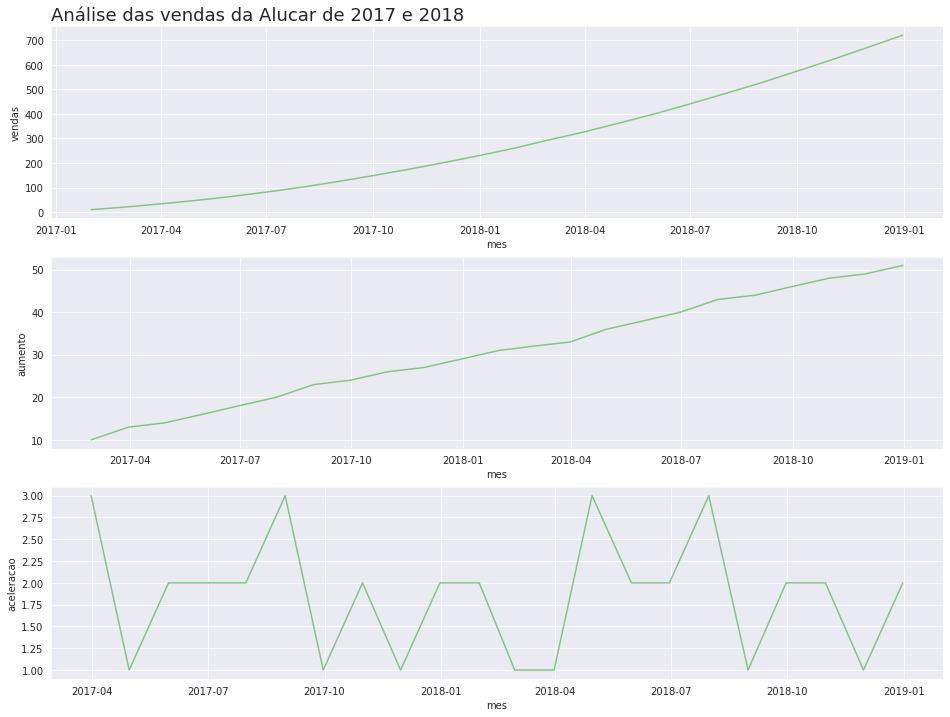

In [ ]:
# testando a função de geração da área com os gráficos
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', alucar, 'Análise das vendas da Alucar de 2017 e 2018')

In [ ]:
# importando a biblioteca para gerar gráficos de autocorrelação entre dados
from pandas.plotting import autocorrelation_plot

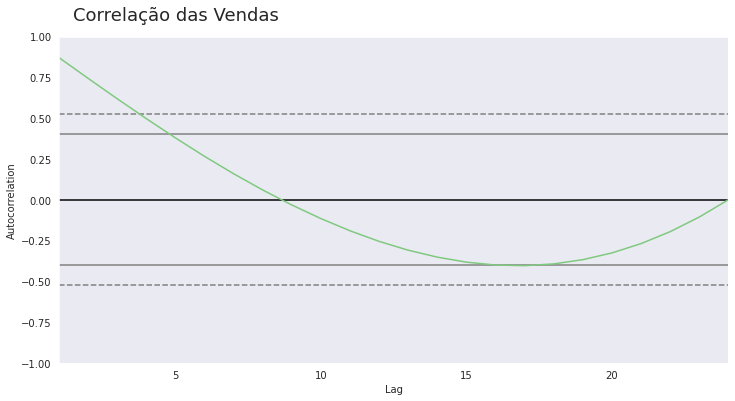

In [ ]:
ax = plt.figure(figsize=(12,6))
# os parâmetros x e y servem para posicionar o título do gráfico
ax.suptitle('Correlação das Vendas', fontsize=18, x=0.26, y=0.95) 
autocorrelation_plot(alucar['vendas'])
ax=ax

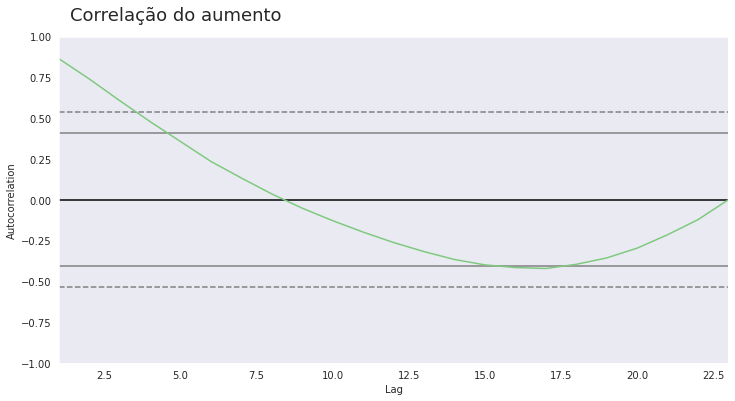

In [ ]:
ax = plt.figure(figsize=(12,6))
# os parâmetros x e y servem para posicionar o título do gráfico
ax.suptitle('Correlação do aumento', fontsize=18, x=0.26, y=0.95) 
# para o gráfico tivemos que utilizar a propriedade [1:] para pular o primeiro dado nulo que tornavana o lag do gráfico de aucorrelação sempre 0
autocorrelation_plot(alucar['aumento'][1:])
ax=ax

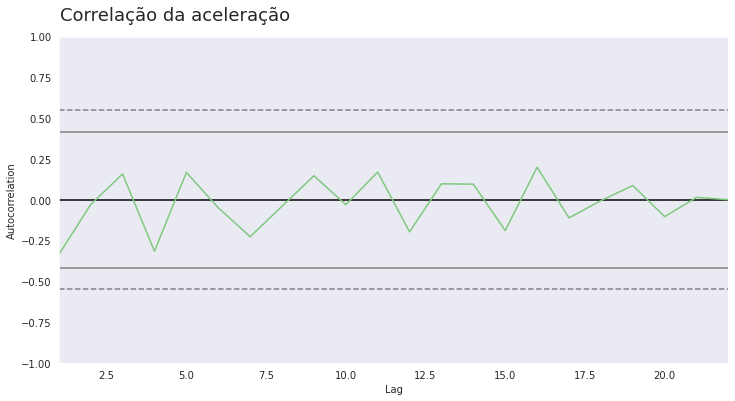

In [ ]:
ax = plt.figure(figsize=(12,6))
# os parâmetros x e y servem para posicionar o título do gráfico
ax.suptitle('Correlação da aceleração', fontsize=18, x=0.26, y=0.95) 
# para o gráfico tivemos que utilizar a propriedade [1:] para pular o primeiro dado nulo que tornavana o lag do gráfico de aucorrelação sempre 0
autocorrelation_plot(alucar['aceleracao'][2:])
ax=ax

# Alucar - Analisando assinantes da newsletter

In [ ]:
assinantes = pd.read_csv('newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [ ]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [ ]:
# verificando os dados
print('Quantidade de linhas e colunas', assinantes.shape)
print('Quantidade de dados nulos', assinantes.isna().sum().sum())

Quantidade de linhas e colunas (24, 2)
Quantidade de dados nulos 0


In [ ]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [ ]:
assinantes['aumento']= assinantes ['assinantes'].diff()
assinantes['aceleracao']= assinantes ['aumento'].diff()

In [ ]:
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


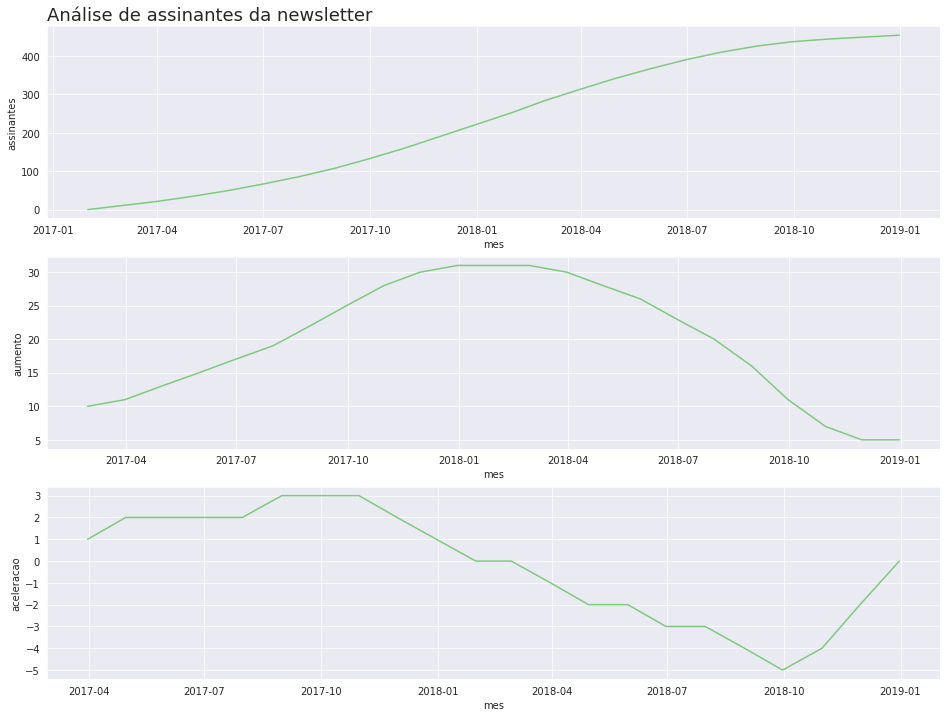

In [ ]:
# utilizando a função plot_comparacao criada para análise dos dados de assinantes
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Análise de assinantes da newsletter')

# Chocolura - Analisando as vendas

In [ ]:
chocolura = pd. read_csv('chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [ ]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [ ]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [ ]:
print ('Quantidade de linhas:', chocolura.shape)
print ('Quantidade de dados nulos:', chocolura.isna().sum().sum())

Quantidade de linhas: (24, 2)
Quantidade de dados nulos: 0


In [ ]:
chocolura['aumento']= chocolura ['vendas'].diff()
chocolura['aceleracao']= chocolura ['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


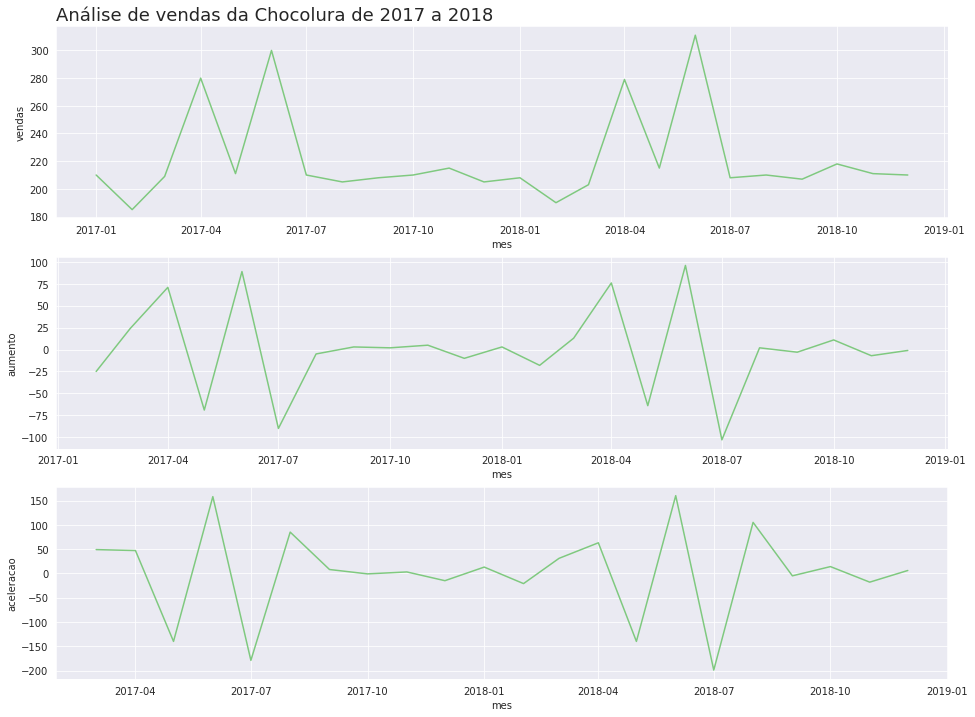

In [ ]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolura, 'Análise de vendas da Chocolura de 2017 a 2018')

# Chocolura - Vendas diárias (Outubro e Novembro

In [ ]:
vendas_por_dia = pd. read_csv('vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [ ]:
print ('Quantidade de linhas:',vendas_por_dia.shape)
print ('Quantidade de dados nulos:', vendas_por_dia.isna().sum().sum())

Quantidade de linhas: (61, 2)
Quantidade de dados nulos: 0


In [ ]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [ ]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])

In [ ]:
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [ ]:
vendas_por_dia['aumento']= vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao']= vendas_por_dia ['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


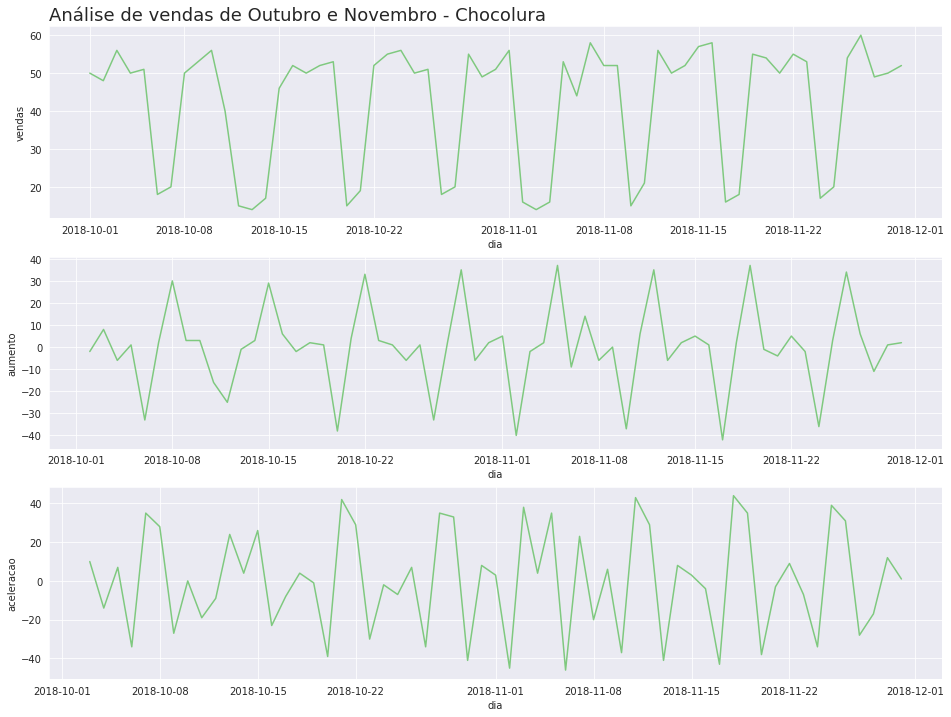

In [ ]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', vendas_por_dia, 'Análise de vendas de Outubro e Novembro - Chocolura')

# Analizando a sazonalidade

In [ ]:
# com o comando .dt.day_name() podemos obter o dia da semana de uma datetime
vendas_por_dia['dia_da_semana'] = vendas_por_dia ['dia'].dt.day_name()
vendas_por_dia.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday
6,2018-10-07,20,2.0,35.0,Sunday


In [ ]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [ ]:
dias_traduzidos = {'Monday': 'Segunda', 'Tuesday' : 'Terca', 'Wednesday':'Quarta', 'Thursday':'Quinta', 'Friday':'Sexta', 'Saturday':'Sabado', 'Sunday':'Domingo'}

In [ ]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)
vendas_por_dia.head(14)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sabado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda
8,2018-10-09,53,3.0,-27.0,Terca
9,2018-10-10,56,3.0,0.0,Quarta


# Agrupando os dias

In [ ]:
# verificando as metas por dia da semana
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [ ]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Sabado,16.0,-28.0,-20.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Terca,52.0,-1.0,-34.0


**Correlação das vendas diárias**

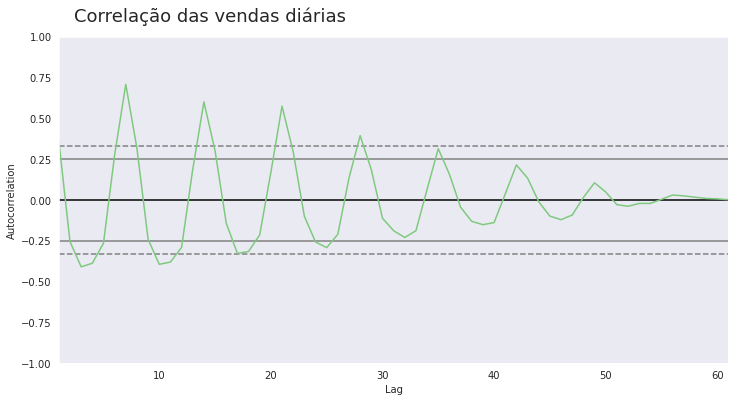

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

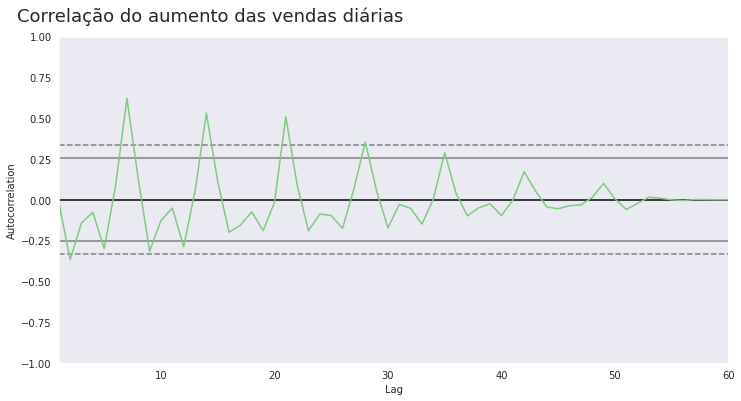

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

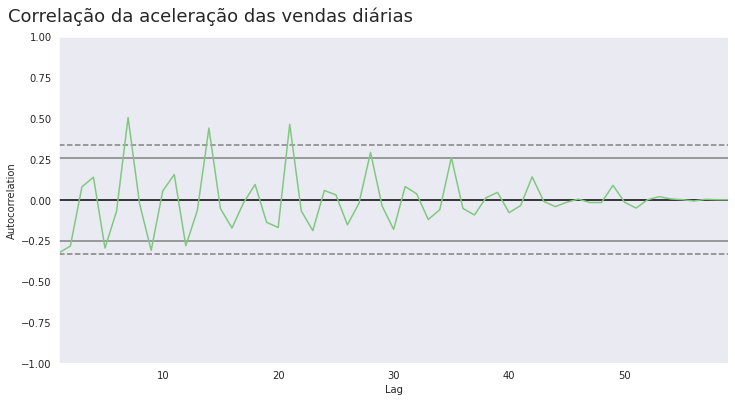

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax

# Cafelura - Análise de vendas

In [ ]:
cafelura = pd.read_csv('cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [ ]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [ ]:
cafelura['mes']= pd.to_datetime(cafelura['mes'])

In [ ]:
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [ ]:
print('Quantidade de linhas e colunas:', cafelura.shape)
print('Quantidade de dados nulos:', cafelura.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


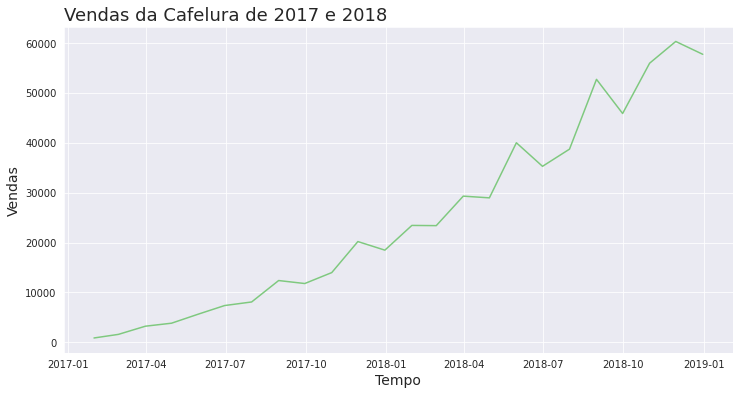

In [ ]:
plotar('Vendas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas', 'mes', 'vendas', cafelura)

In [ ]:
# dataset cotendo a quantidade de dias de fds por mês existente
quantidade_de_dias_de_fds = pd.read_csv('dias_final_de_semana.csv')

In [ ]:
quantidade_de_dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [ ]:
# array contendo os valores de dias de fds
quantidade_de_dias_de_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [ ]:
# normalizando as vendas baseando na distribuição por dias de final de semana no mês
cafelura['vendas_normalizadas']= cafelura['vendas']/quantidade_de_dias_de_fds['quantidade_de_dias'].values
cafelura.head

<bound method NDFrame.head of           mes  vendas  vendas_normalizadas
0  2017-01-31     880                110.0
1  2017-02-28    1600                200.0
2  2017-03-31    3240                324.0
3  2017-04-30    3840                480.0
4  2017-05-31    5670                630.0
5  2017-06-30    7380                820.0
6  2017-07-31    8096               1012.0
7  2017-08-31   12390               1239.0
8  2017-09-30   11792               1474.0
9  2017-10-31   13984               1748.0
10 2017-11-30   20200               2020.0
11 2017-12-31   18480               2310.0
12 2018-01-31   23436               2604.0
13 2018-02-28   23392               2924.0
14 2018-03-31   29304               3256.0
15 2018-04-30   28960               3620.0
16 2018-05-31   40000               4000.0
17 2018-06-30   35280               4410.0
18 2018-07-31   38720               4840.0
19 2018-08-31   52710               5271.0
20 2018-09-30   45864               5733.0
21 2018-10-31   55944   

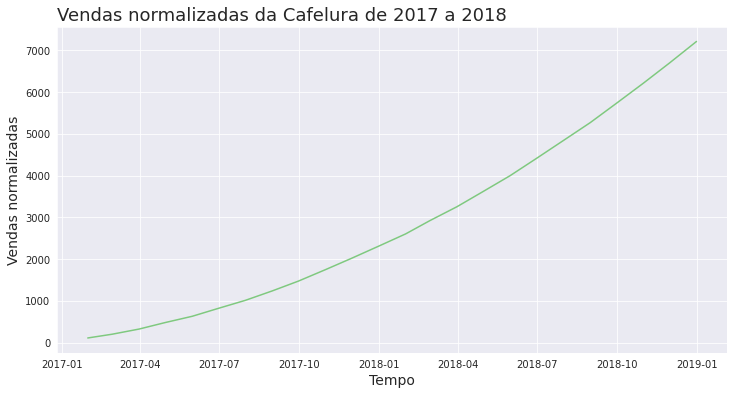

In [ ]:
# plotando gráfico com as vendas normalizadas
plotar('Vendas normalizadas da Cafelura de 2017 a 2018', 'Tempo', 'Vendas normalizadas', 'mes', 'vendas_normalizadas', cafelura)

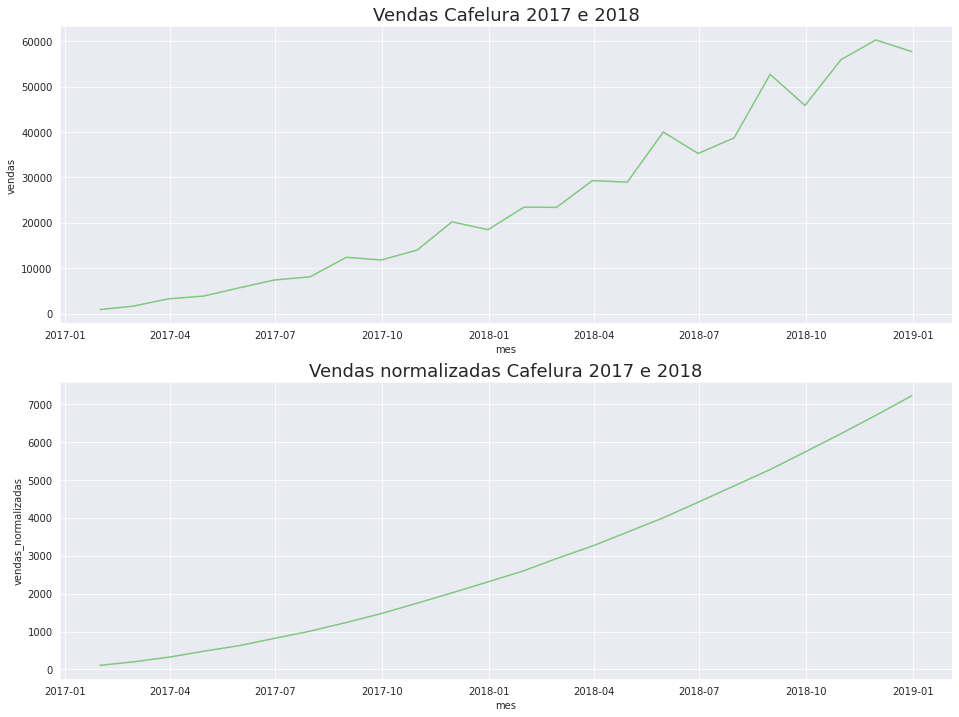

In [ ]:
# comparativo entre as visões
plt.figure(figsize=(16,12))
ax=plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax=plt.subplot(2,1,2)
ax.set_title('Vendas normalizadas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
ax=ax 

# Statsmodels

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

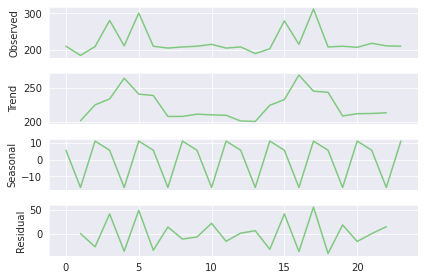

In [ ]:
# verificando com a função statsmodels os dados de relevância em uma list
resultado = seasonal_decompose(chocolura['vendas'],  freq=3)
ax = resultado.plot()

In [ ]:
# atribuindo os resultados uma variável para criação de um df com os dados
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [ ]:
# adicionando os dados a um dicionário e posteriormente a um df
data = ({
       'observacao':observacao,
       'tendencia':tendencia, 
       'sazonalidade':sazonalidade,
       'ruido':ruido
})
resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210,NaN,5.603175,NaN
1,185,201.333333,-16.730159,0.396825
2,209,224.666667,11.126984,-26.793651
3,280,233.333333,5.603175,41.063492
4,211,263.666667,-16.730159,-35.936508


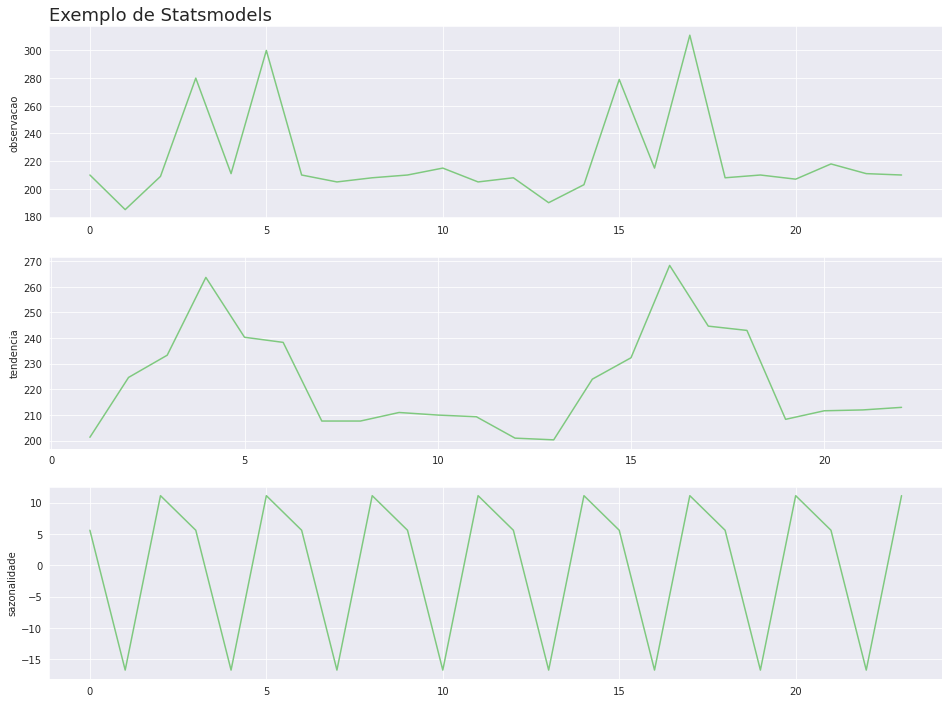

In [ ]:
# plotando resultados do df
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado, 'Exemplo de Statsmodels')

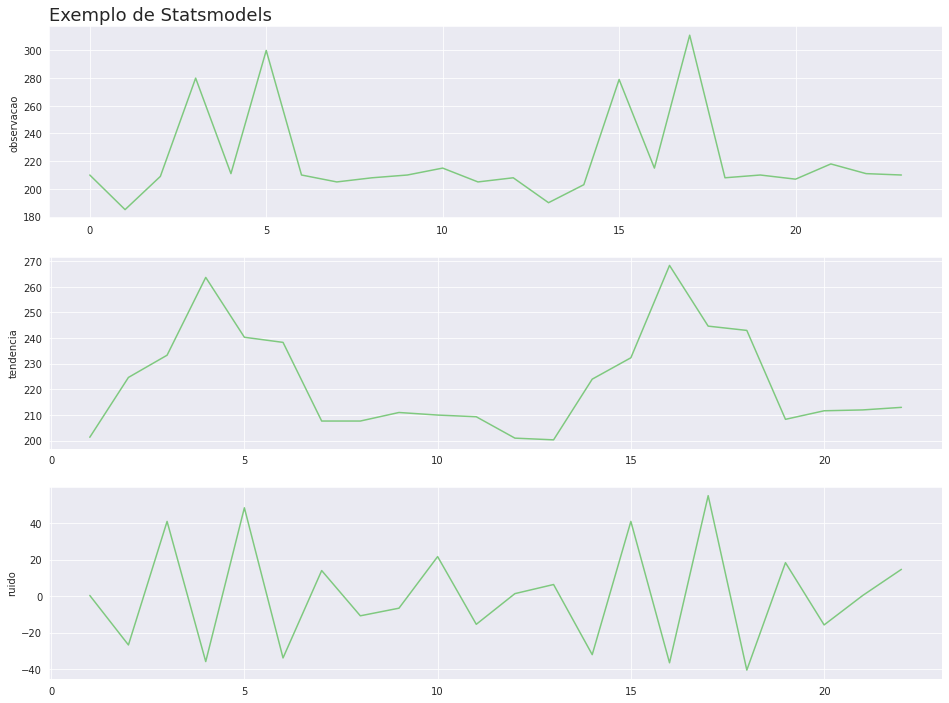

In [ ]:
# plotando resultados do df
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'ruido', resultado, 'Exemplo de Statsmodels')

# Alucel - Análise de vendas

In [ ]:
alucel = pd.read_csv('alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [ ]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [ ]:
print('Quantidade de linhas e colunas:', alucel.shape)
print('Quantidade de dados nulos:', alucel.isna().sum().sum())

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [ ]:
alucel ['aumento'] = alucel ['vendas'].diff()
alucel ['aceleracao'] = alucel ['aumento'].diff()
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


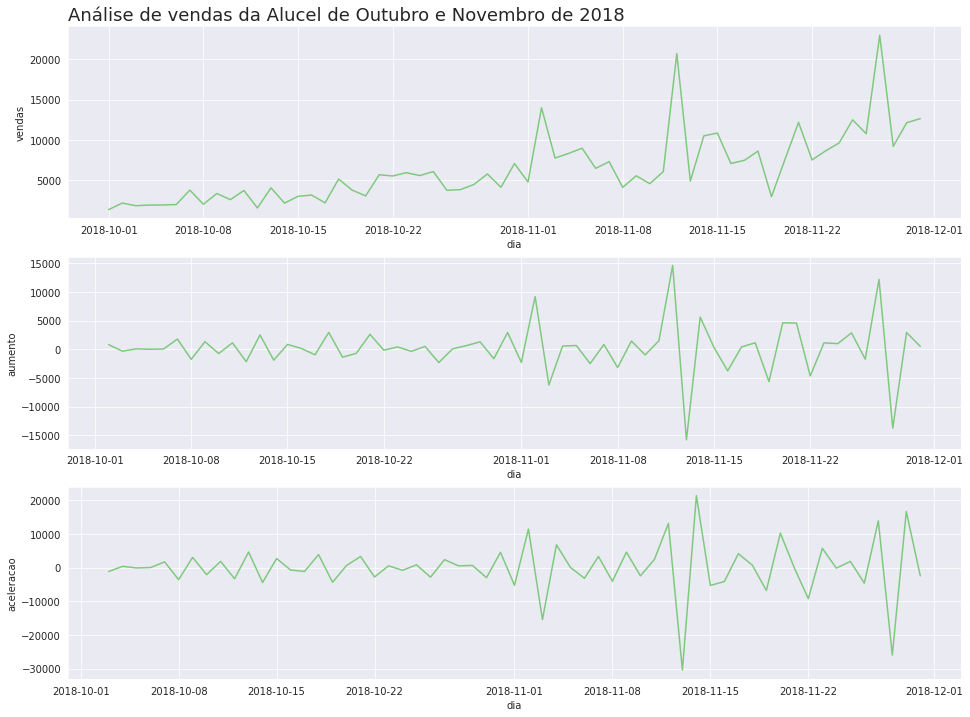

In [ ]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', alucel, 'Análise de vendas da Alucel de Outubro e Novembro de 2018')

**Média móvel**

In [ ]:
# o comando .rolling com o parâmetro de frequência a ser inserido, gera uma média móvel entre pontos
# a média móvel é muito útil para normalizar dados que possuem uma forte variável em curta frequência, para determinal a tendência de uma variável
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()
alucel.head(8)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429
7,2018-10-08,2039.59,-1753.48,-3540.66,2252.827143


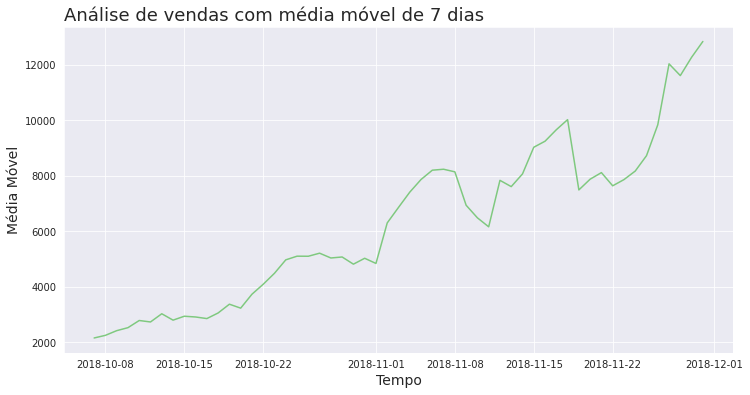

In [ ]:
plotar('Análise de vendas com média móvel de 7 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel', alucel)

In [ ]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()

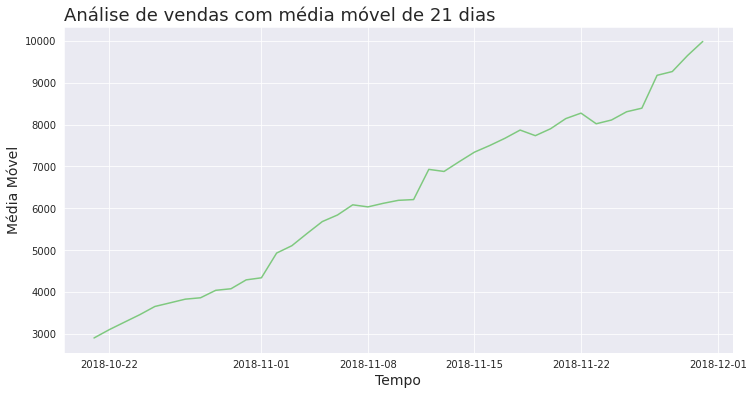

In [ ]:
plotar('Análise de vendas com média móvel de 21 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel_21', alucel)

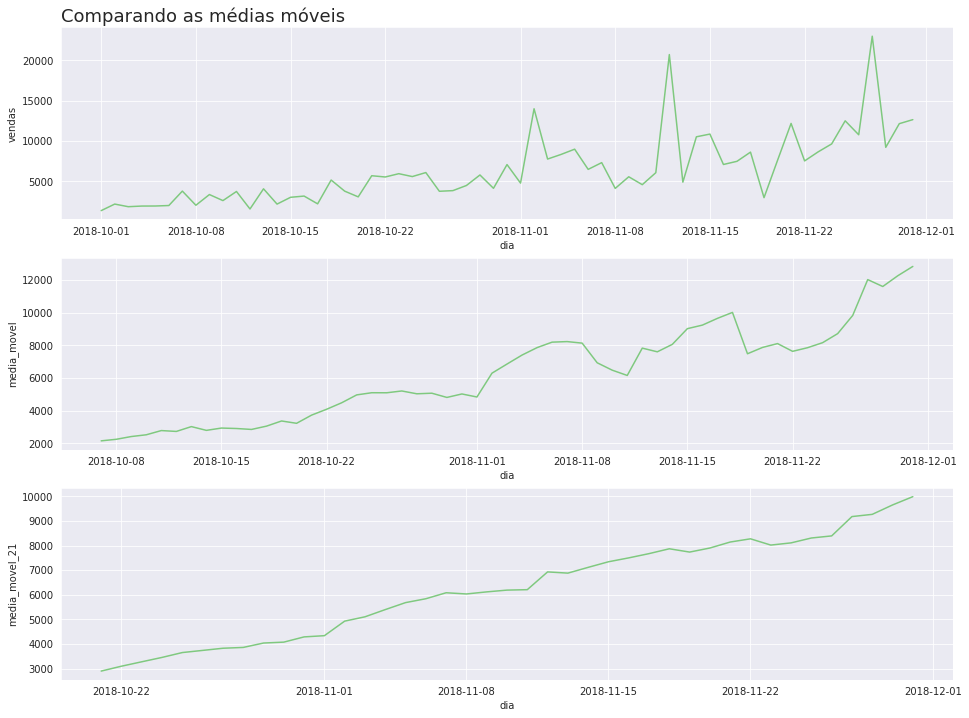

In [ ]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_21', alucel, 'Comparando as médias móveis')